In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cp=pd.read_csv('cp1.csv')
cp.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,45.6033,28.1900,26.2067,13.5,No
2,3,45.0107,28.9677,26.0215,11.7,No
3,4,44.5398,28.9899,26.4703,13.5,No
4,5,43.2870,30.6972,26.0158,12.4,No


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


In [5]:
cp.isnull().sum()                                                        # checking for the null values in the dataset 

Number          0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [6]:
cp[['%Red Pixel','%Green pixel','%Blue pixel']].head()

,%Red Pixel,%Green pixel,%Blue pixel
0,43.2555,30.8421,25.9025
1,45.6033,28.1900,26.2067
2,45.0107,28.9677,26.0215
3,44.5398,28.9899,26.4703
4,43.2870,30.6972,26.0158


In [7]:
cp.columns

Index(['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic'], dtype='object')

In [8]:
X=cp[['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y=cp['Anaemic']

In [45]:
X.corr()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
Number,1.000000,0.286166,-0.077089,-0.345707,-0.019768
%Red Pixel,0.286166,1.000000,-0.732003,-0.845764,0.424586
%Green pixel,-0.077089,-0.732003,1.000000,0.255589,-0.637340
%Blue pixel,-0.345707,-0.845764,0.255589,1.000000,-0.103373
Hb,-0.019768,0.424586,-0.637340,-0.103373,1.000000


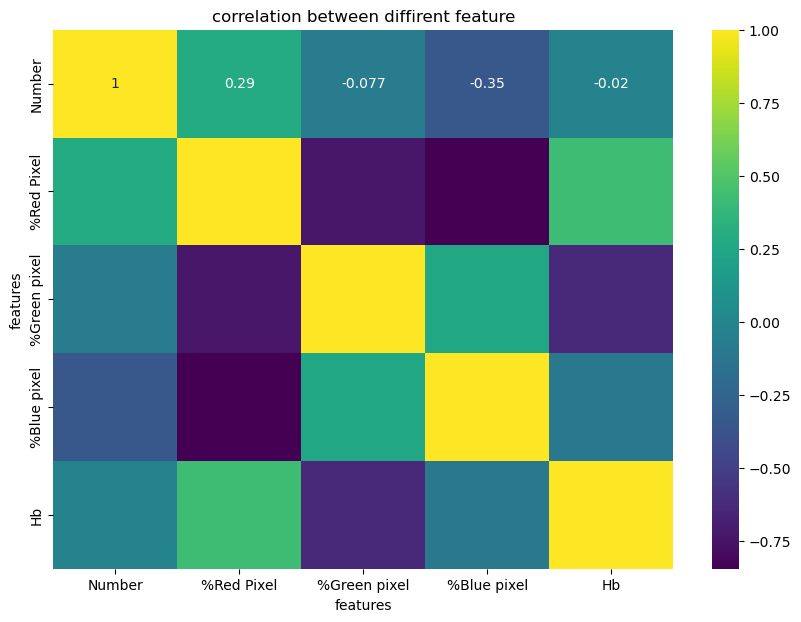

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.heatmap(X.corr(),annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('correlation between diffirent feature')
plt.show()

In [10]:
cp['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [11]:
pd.pivot_table(cp,index='Anaemic',values=['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'])

,%Blue pixel,%Green pixel,%Red Pixel,Hb,Number
Anaemic,,,,,
No,25.404364,28.369649,46.225991,13.257692,51.564103
Yes,25.668208,30.393081,43.938727,8.830769,55.307692


In [12]:
from sklearn.model_selection import  train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.4,random_state=46)

In [14]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((62, 5), (42, 5), (62,), (42,))

In [15]:
acc=[]
model=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
import warnings
warnings.filterwarnings('ignore')
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(X_test)

In [18]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98        31
         Yes       1.00      0.91      0.95        11

    accuracy                           0.98        42
   macro avg       0.98      0.95      0.97        42
weighted avg       0.98      0.98      0.98        42



In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score=cross_val_score(model,X,y,cv=5)
print("cross val score is",score)

cross val score is [0.95238095 1.         1.         0.95238095 0.95      ]


In [21]:
cp.loc[9]

Number               10
%Red Pixel      46.5143
%Green pixel    27.4282
%Blue pixel     26.0575
Hb                  9.7
Anaemic             Yes
Name: 9, dtype: object

In [22]:
model.predict([[10,46.5143,27.4282,26.0575,9.7]])

array(['Yes'], dtype=object)

In [23]:
cp.loc[10]

Number               11
%Red Pixel      45.3506
%Green pixel    29.1248
%Blue pixel     25.5246
Hb                 12.6
Anaemic              No
Name: 10, dtype: object

In [24]:
model.predict([[11,45.3506,29.1248,25.5246,12.6]])

array(['No'], dtype=object)

In [25]:
cp.loc[5]

Number                6
%Red Pixel      45.0994
%Green pixel    27.9645
%Blue pixel     26.9361
Hb                 16.2
Anaemic              No
Name: 5, dtype: object

In [26]:
model.predict([[6,45.0994,27.9645,26.9361,16.2]])

array(['No'], dtype=object)

In [27]:
cp.loc[1]

Number                2
%Red Pixel      45.6033
%Green pixel      28.19
%Blue pixel     26.2067
Hb                 13.5
Anaemic              No
Name: 1, dtype: object

In [28]:
model.predict([[2,45.6033,28.19,26.2067,13.5]])

array(['No'], dtype=object)

In [29]:
cp.loc[57]

Number               58
%Red Pixel      45.7986
%Green pixel    27.7309
%Blue pixel     26.4706
Hb                 13.0
Anaemic              No
Name: 57, dtype: object

In [30]:
model.predict([[58,45.7986,27.7309,26.4706,13.0]])

array(['No'], dtype=object)

In [31]:
cp.loc[25]

Number               26
%Red Pixel      43.4098
%Green pixel    31.2315
%Blue pixel     25.3586
Hb                 12.9
Anaemic              No
Name: 25, dtype: object

In [32]:
model.predict([[26,43.4098,31.2315,25.3586,12.9]])

array(['No'], dtype=object)

In [33]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


In [34]:
cp.head(104)

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,45.6033,28.1900,26.2067,13.5,No
2,3,45.0107,28.9677,26.0215,11.7,No
3,4,44.5398,28.9899,26.4703,13.5,No
4,5,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,Yes
100,101,42.2324,30.6757,27.0919,6.3,Yes
101,102,45.6064,31.9084,22.4852,12.7,No
102,103,45.2095,29.2769,25.5136,13.4,No


In [35]:
cp.columns

Index(['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic'], dtype='object')

In [36]:
X=cp[['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
Y=cp['Anaemic']

In [37]:
X.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,1,43.2555,30.8421,25.9025,6.3
1,2,45.6033,28.1900,26.2067,13.5
2,3,45.0107,28.9677,26.0215,11.7
3,4,44.5398,28.9899,26.4703,13.5
4,5,43.2870,30.6972,26.0158,12.4


In [38]:
cp.head(5)

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,45.6033,28.1900,26.2067,13.5,No
2,3,45.0107,28.9677,26.0215,11.7,No
3,4,44.5398,28.9899,26.4703,13.5,No
4,5,43.2870,30.6972,26.0158,12.4,No


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
Anaemic_encoder=LabelEncoder()

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
Anaemic_encoder.fit(pd.DataFrame(cp['Anaemic']))
cp['Anaemic']=Anaemic_encoder.transform(cp['Anaemic'])

In [43]:
cp.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,2,45.6033,28.1900,26.2067,13.5,0
2,3,45.0107,28.9677,26.0215,11.7,0
3,4,44.5398,28.9899,26.4703,13.5,0
4,5,43.2870,30.6972,26.0158,12.4,0


In [44]:
cp.head(104)

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,2,45.6033,28.1900,26.2067,13.5,0
2,3,45.0107,28.9677,26.0215,11.7,0
3,4,44.5398,28.9899,26.4703,13.5,0
4,5,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,1
100,101,42.2324,30.6757,27.0919,6.3,1
101,102,45.6064,31.9084,22.4852,12.7,0
102,103,45.2095,29.2769,25.5136,13.4,0
